# Exploratory Data Analysis of Retail Sales Dataset

Link to dataset: https://www.kaggle.com/datasets/sahirmaharajj/retail-sales-analysis/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Reading the downloaded CVS
main_df = pd.read_csv("dataset.csv")
main_df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
...,...,...,...,...,...,...,...,...,...
307640,2020,9,BOSTON BEER CORPORATION,98868,SAM ADAMS OCTOBERFEST 1/6K,KEGS,0.00,0.0,54.0
307641,2020,9,GLOBAL OCEAN AND AIR CARGO SERVICES,98884,HARAR BEER 4/6NR - 11.2OZ,BEER,1.50,1.0,8.0
307642,2020,9,HEINEKEN USA,98906,DOS EQUIS LAGER 1/2K,KEGS,0.00,0.0,22.0
307643,2020,9,RELIABLE CHURCHILL LLLP,98914,LINDEMANS KRIEK NR - 25.4OZ,BEER,0.00,0.0,4.0


In [3]:
#To identify columns with null values and to check the data type of the columns
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [4]:
#Count of null values across columns
main_df.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [5]:
#Drop all null values and check check
df = main_df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307477 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307477 non-null  int64  
 1   MONTH             307477 non-null  int64  
 2   SUPPLIER          307477 non-null  object 
 3   ITEM CODE         307477 non-null  object 
 4   ITEM DESCRIPTION  307477 non-null  object 
 5   ITEM TYPE         307477 non-null  object 
 6   RETAIL SALES      307477 non-null  float64
 7   RETAIL TRANSFERS  307477 non-null  float64
 8   WAREHOUSE SALES   307477 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 23.5+ MB


In [6]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [7]:
#Create a new temporal column to convert INT64 into DATETIME
df.loc[:, ['DATE']] = pd.to_datetime(df[['YEAR','MONTH']].assign(day=1)) + pd.offsets.MonthEnd()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307477 entries, 0 to 307644
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   YEAR              307477 non-null  int64         
 1   MONTH             307477 non-null  int64         
 2   SUPPLIER          307477 non-null  object        
 3   ITEM CODE         307477 non-null  object        
 4   ITEM DESCRIPTION  307477 non-null  object        
 5   ITEM TYPE         307477 non-null  object        
 6   RETAIL SALES      307477 non-null  float64       
 7   RETAIL TRANSFERS  307477 non-null  float64       
 8   WAREHOUSE SALES   307477 non-null  float64       
 9   DATE              307477 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 25.8+ MB


In [8]:
#List of values indicate the distinct item types being sold by the retailer
print(df['ITEM TYPE'].unique())
df.set_index('ITEM TYPE',inplace=True)
df = df.loc[['WINE','BEER','LIQUOR','KEGS','NON-ALCOHOL']]

In [9]:
#List of values indicate the distinct items being sold by the retailer
df['ITEM DESCRIPTION'].unique()

array(['BOOTLEG RED - 750ML', 'MOMENT DE PLAISIR - 750ML',
       'SCHLINK HAUS KABINETT - 750ML', ...,
       'GIFFARD SYRUP ORGEAT NA - 1L',
       'MASTER OF MIXES BB-STRAWBERRY - 3L',
       'MASTER OF MIXES BB MARG - 3L'], shape=(34777,), dtype=object)

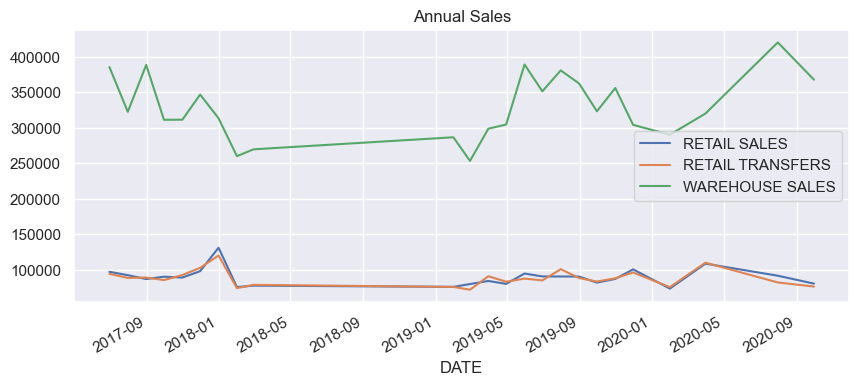

In [10]:
%matplotlib inline

#Plot total sales against dates
df.groupby('DATE')[['RETAIL SALES','RETAIL TRANSFERS','WAREHOUSE SALES']].sum().plot(figsize=(10,4))
# plt.xticks(['2017','2018','2019','2020'])
# # plt.minorticks_on()
plt.title("Annual Sales")
plt.show()

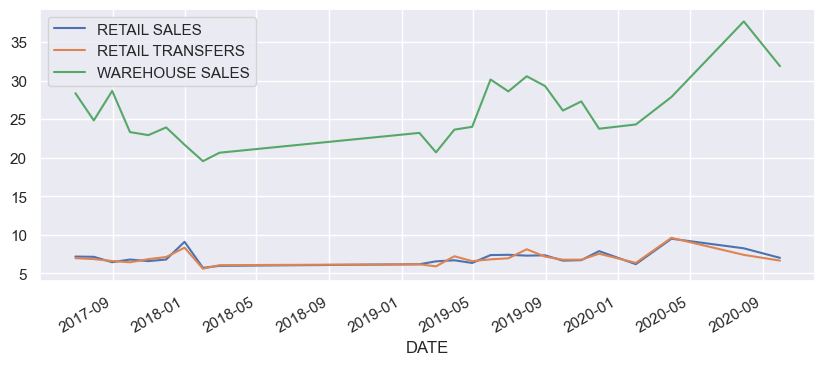

In [11]:
#Plot Average sales against dates
df.groupby('DATE')[['RETAIL SALES','RETAIL TRANSFERS','WAREHOUSE SALES']].mean().plot(figsize=(10,4))
plt.show()

<b>Inference:</b> Increasing trend in Warehouse sales since 2018

In [12]:
#To make plotting easier, converting sales number i.e. instead of 250,000 it will be 250K

rt_sales_sum = df.groupby('MONTH')[['RETAIL SALES']].sum()/1000
rt_sales_avg = df.groupby('MONTH')[['RETAIL SALES']].mean()
# print(rt_sales_sum,rt_sales_avg)

rt_transf_sum = df.groupby('MONTH')[['RETAIL TRANSFERS']].sum()/1000
rt_transf_avg = df.groupby('MONTH')[['RETAIL TRANSFERS']].mean()
# print(rt_transf_sum,rt_transf_avg)

wh_sls_sum = df.groupby('MONTH')[['WAREHOUSE SALES']].sum()/1000
wh_sls_avg = df.groupby('MONTH')[['WAREHOUSE SALES']].mean()
# print(wh_sls_sum,wh_sls_avg)

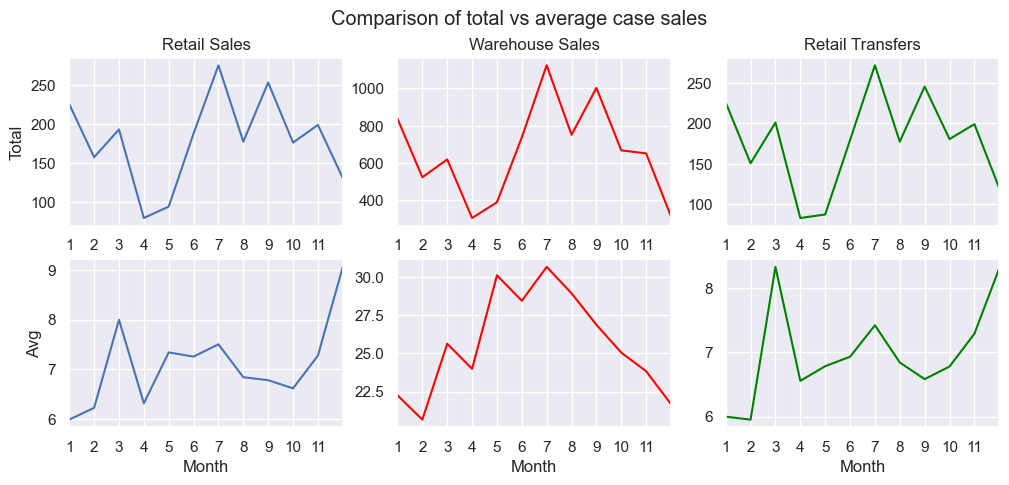

In [13]:
%matplotlib inline

rt_sales_sum = df.groupby('MONTH')[['RETAIL SALES']].sum()/1000
rt_sales_avg = df.groupby('MONTH')[['RETAIL SALES']].mean()

rt_transf_sum = df.groupby('MONTH')[['RETAIL TRANSFERS']].sum()/1000
rt_transf_avg = df.groupby('MONTH')[['RETAIL TRANSFERS']].mean()

wh_sls_sum = df.groupby('MONTH')[['WAREHOUSE SALES']].sum()/1000
wh_sls_avg = df.groupby('MONTH')[['WAREHOUSE SALES']].mean()

fig, ax = plt.subplots(2,3)

fig.suptitle('Comparison of total vs average case sales')
fig.set_figwidth(12)

ax[0][0].set_xlim([1,12])
ax[0][1].set_xlim([1,12])
ax[0][2].set_xlim([1,12])
ax[1][0].set_xlim([1,12])
ax[1][1].set_xlim([1,12])
ax[1][2].set_xlim([1,12])

ax[0][0].set_xticks(np.arange(1,12,1))
ax[0][1].set_xticks(np.arange(1,12,1))
ax[0][2].set_xticks(np.arange(1,12,1))
ax[1][0].set_xticks(np.arange(1,12,1))
ax[1][1].set_xticks(np.arange(1,12,1))
ax[1][2].set_xticks(np.arange(1,12,1))

# ax[0][0].set_yticks(np.arange(0,100000,100000))
# ax[0][1].set_yticks(np.arange(1,12,1))
# ax[0][2].set_yticks(np.arange(1,12,1))
# ax[1][0].set_yticks(np.arange(1,12,1))
# ax[1][1].set_yticks(np.arange(1,12,1))
# ax[1][2].set_yticks(np.arange(1,12,1))

ax[0][0].plot(range(1,13),rt_sales_sum)
ax[0][0].set_title('Retail Sales')
ax[0][0].set_ylabel('Total')

ax[1][0].plot(range(1,13),rt_sales_avg)
ax[1][0].set_ylabel('Avg')
ax[1][0].set_xlabel('Month')

ax[0][1].plot(range(1,13),wh_sls_sum,color='red')
ax[0][1].set_title('Warehouse Sales')

ax[1][1].plot(range(1,13),wh_sls_avg,color='red')
ax[1][1].set_xlabel('Month')

ax[0][2].plot(range(1,13),rt_transf_sum,color='green')
ax[0][2].set_title('Retail Transfers')

ax[1][2].plot(range(1,13),rt_transf_avg,color='green')
ax[1][2].set_xlabel('Month')

plt.show()

<b>Inference: </b>
1. Warehouse sales shows increasing trend during the first half of the year and a decreasing trend in the second half with peak sales in July
2. Months between May & September show robust sales with peak in July
3. Average sales are increasing towards end of year (Nov, Dec & Jan) indicate bulk purchases (possibly for gifting) even though the overall sales show a decreasing trend


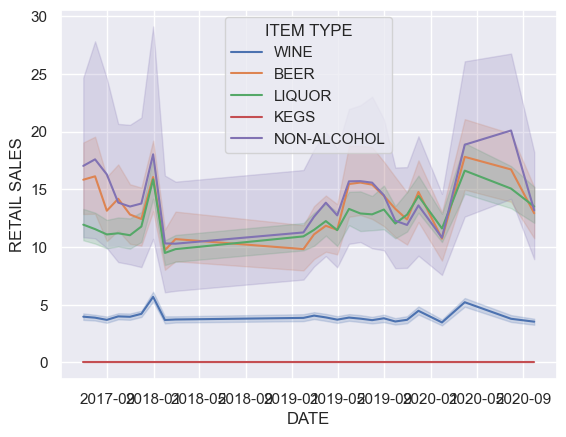

In [14]:
%matplotlib inline
    
sns.lineplot(data=df, x="DATE", y="RETAIL SALES", hue="ITEM TYPE")
plt.show()

<b>Inference:</b> In Retail Sales Beer, Liquor and Non-Alcoholic beverages items types with higher demand while Wine has relatively lower demand

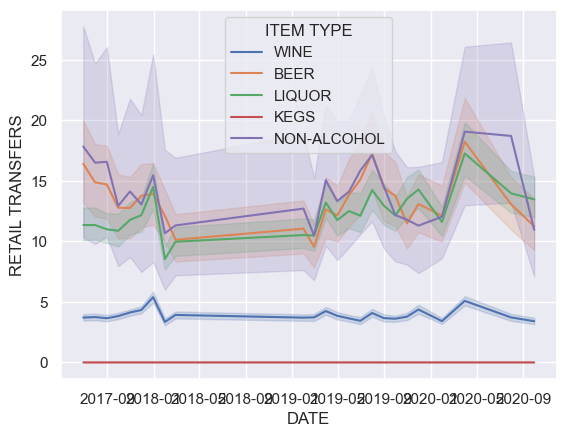

In [16]:
%matplotlib inline
    
sns.lineplot(data=df, x="DATE", y="RETAIL TRANSFERS", hue="ITEM TYPE")
plt.show()

In [18]:
<b>Inference:</b> In retail transfers too Beer, Liquor and Non-Alcoholic beverages items types with higher demand while Wine has relatively lower demand

SyntaxError: invalid syntax (4268141371.py, line 1)

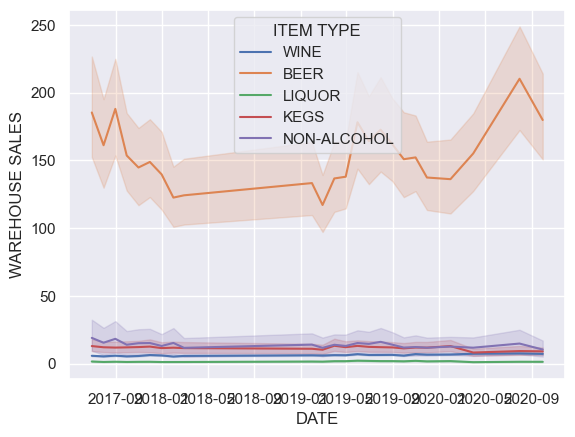

In [17]:
%matplotlib inline
    
sns.lineplot(data=df, x="DATE", y="WAREHOUSE SALES",hue='ITEM TYPE')
plt.show()

<b>Inference:</b> Sales of Beer is higher in Warehouse sales, likely supplying to pubs and restaurants. Relatively the sales of other bottles beverages are less

In [22]:
item_sales = df.groupby('ITEM TYPE')[['RETAIL SALES']].sum()
top_items = item_sales.sort_values(by=['RETAIL SALES'], ascending = False)
print(top_items)


             RETAIL SALES
ITEM TYPE                
LIQUOR          802691.43
WINE            746498.59
BEER            574220.53
NON-ALCOHOL      27150.31
KEGS                 0.00


<b>Inference:</b> Top Selling items through Retail Sales are Liquor, Wine and Beer and then Non-Alcoholic in that order

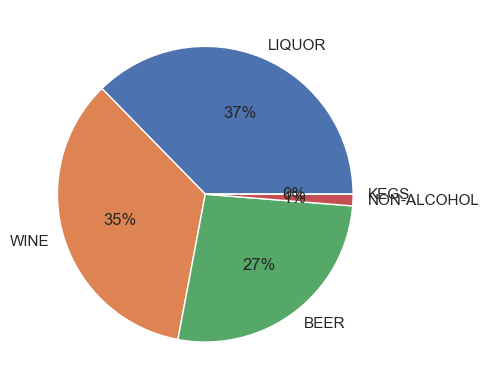

In [24]:
%matplotlib inline

colors = sns.color_palette('deep')[0:5]
plt.pie(top_items['RETAIL SALES'],labels=top_items.index,colors=colors,autopct='%.0f%%')
plt.show()

In [25]:
item_sales = df.groupby('ITEM TYPE')[['WAREHOUSE SALES']].sum()
top_items = item_sales.sort_values(by=['WAREHOUSE SALES'], ascending = False)
top_items = top_items[top_items.ge(0).all(1)]
print(top_items)

             WAREHOUSE SALES
ITEM TYPE                   
BEER              6527236.51
WINE              1156984.91
KEGS               118431.00
LIQUOR              94906.27
NON-ALCOHOL         26149.59


<b>Inference:</b> Top Selling items through Warehouse Sales are Beer, Wine, Kegs, Liquor and then Non-Alcoholic in that order

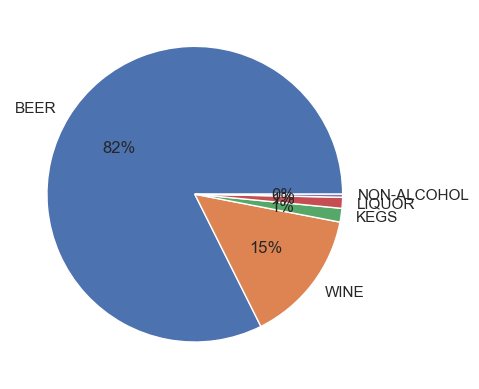

In [25]:
%matplotlib inline

plt.pie(top_items['WAREHOUSE SALES'],labels=top_items.index,colors=colors,autopct='%.0f%%')
plt.show()

In [26]:
item_sales = df.groupby('ITEM TYPE')[['RETAIL TRANSFERS']].sum()
top_items = item_sales.sort_values(by=['RETAIL TRANSFERS'], ascending = False)
top_items = top_items[top_items.ge(0).all(1)]
print(top_items)

             RETAIL TRANSFERS
ITEM TYPE                    
LIQUOR              794735.71
WINE                734618.04
BEER                566714.00
NON-ALCOHOL          26666.38


<b>Inference:</b> Top Selling items through Retail Transfers are Liquor,Wine, Beer and then Non-Alcoholic in that order

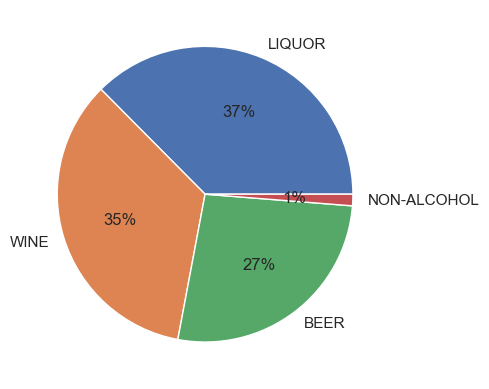

In [27]:
%matplotlib inline

plt.pie(top_items['RETAIL TRANSFERS'],labels=top_items.index,colors=colors,autopct='%.0f%%')
plt.show()

In [20]:
item_sales = df.groupby('SUPPLIER')[['RETAIL SALES']].sum()
top_items = item_sales.sort_values(by=['RETAIL SALES'], ascending = False)
print(top_items.head())

                          RETAIL SALES
SUPPLIER                              
E & J GALLO WINERY           166170.53
DIAGEO NORTH AMERICA INC     145343.20
CONSTELLATION BRANDS         131664.79
ANHEUSER BUSCH INC           109960.82
JIM BEAM BRANDS CO            96164.04


<b>Inference:</b> Top suppliers whose products are selling through retail

In [29]:
item_sales = df.groupby('SUPPLIER')[['WAREHOUSE SALES']].sum()
top_items = item_sales.sort_values(by=['WAREHOUSE SALES'], ascending = False)
print(top_items.head())

                        WAREHOUSE SALES
SUPPLIER                               
CROWN IMPORTS                1651871.51
MILLER BREWING COMPANY       1425428.71
ANHEUSER BUSCH INC           1398695.84
HEINEKEN USA                  829796.46
E & J GALLO WINERY            197463.78


<b>Inference:</b> Top suppliers whose products are selling through warehouse

      RETAIL SALES
YEAR              
2017     686734.57
2018     153595.90
2019     958179.83
2020     354949.09


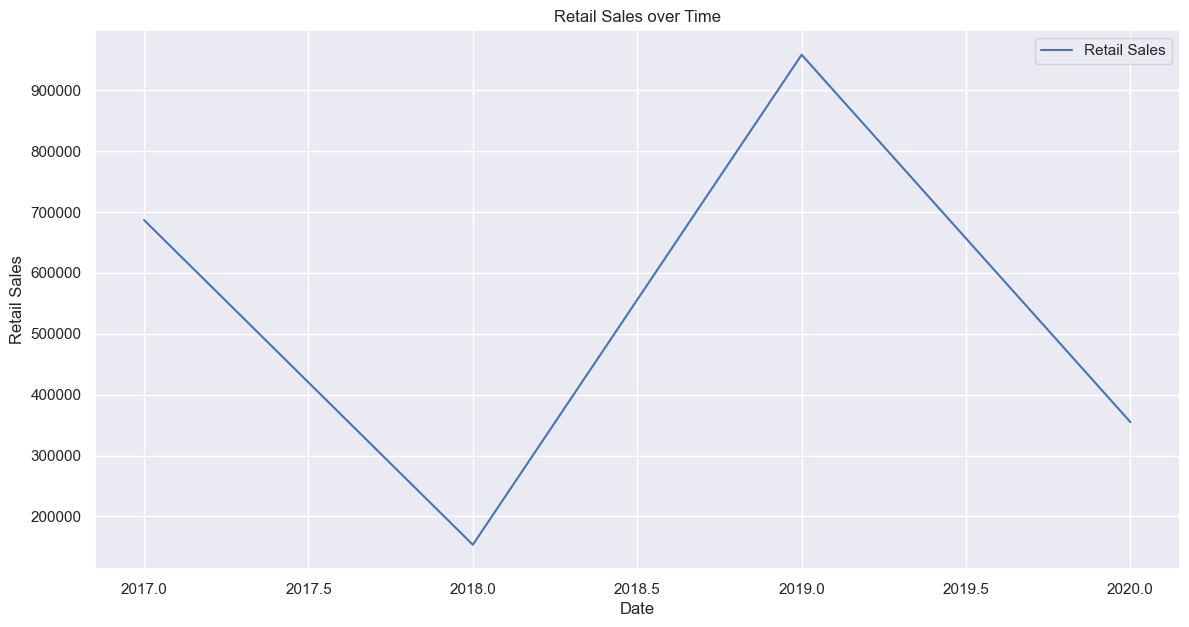

In [22]:
# Plotting the original Retail Sales
gdata = df.groupby('YEAR')[['RETAIL SALES']].sum()
print(gdata)
plt.figure(figsize=(14, 7))
plt.plot(gdata.index, gdata, label='Retail Sales')
plt.title('Retail Sales over Time')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.legend()
plt.show()

In [23]:
gdata.describe()

,RETAIL SALES
count,4.000000
mean,538364.847500
std,355877.636811
min,153595.900000
25%,304610.792500
50%,520841.830000
75%,754595.885000
max,958179.830000


<b>Inference:</b> Year wise plot does not provide much details 

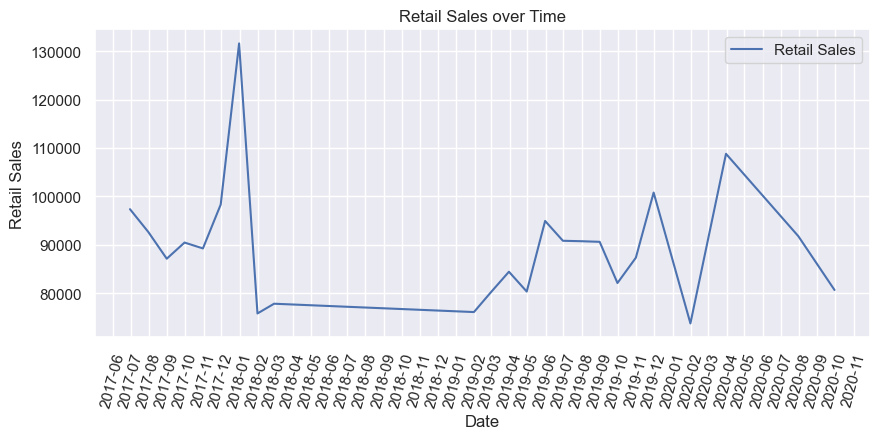

In [24]:
%matplotlib inline

import matplotlib.dates as mdates

# Plotting the original Retail Sales
ddata = df.groupby('DATE')[['RETAIL SALES']].sum()
# print(ddata)
plt.figure(figsize=(10, 4))
plt.plot(ddata.index, ddata, label='Retail Sales')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.title('Retail Sales over Time')
plt.xlabel('Date')
plt.xticks(rotation=75)
plt.ylabel('Retail Sales')
plt.legend()
plt.show()

In [25]:
print(ddata)

            RETAIL SALES
DATE                    
2017-06-30      97357.26
2017-07-31      92625.29
2017-08-31      87111.78
2017-09-30      90452.60
2017-10-31      89236.96
2017-11-30      98316.19
2017-12-31     131634.49
2018-01-31      75791.77
2018-02-28      77804.13
2019-01-31      76079.68
2019-02-28      80094.49
2019-03-31      84417.64
2019-04-30      80320.72
2019-05-31      94921.74
2019-06-30      90821.64
2019-07-31      90730.72
2019-08-31      90603.58
2019-09-30      82086.13
2019-10-31      87316.63
2019-11-30     100786.86
2020-01-31      73731.60
2020-03-31     108807.63
2020-07-31      91766.60
2020-09-30      80643.26


In [26]:
# Create a date range with the desired frequency
date_range = pd.date_range(start=ddata.index.min(), end=ddata.index.max(), freq='M')
print(date_range)
ddata = ddata.reindex(date_range)

DatetimeIndex(['2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30',
               '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
               '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
               '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30'],
              dtype='datetime64[ns]', freq='ME')


C:\Users\nagha\AppData\Local\Temp\ipykernel_22608\3967512792.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=ddata.index.min(), end=ddata.index.max(), freq='M')


In [27]:
ddata.fillna(0,inplace=True)
print(ddata)

            RETAIL SALES
2017-06-30      97357.26
2017-07-31      92625.29
2017-08-31      87111.78
2017-09-30      90452.60
2017-10-31      89236.96
2017-11-30      98316.19
2017-12-31     131634.49
2018-01-31      75791.77
2018-02-28      77804.13
2018-03-31          0.00
2018-04-30          0.00
2018-05-31          0.00
2018-06-30          0.00
2018-07-31          0.00
2018-08-31          0.00
2018-09-30          0.00
2018-10-31          0.00
2018-11-30          0.00
2018-12-31          0.00
2019-01-31      76079.68
2019-02-28      80094.49
2019-03-31      84417.64
2019-04-30      80320.72
2019-05-31      94921.74
2019-06-30      90821.64
2019-07-31      90730.72
2019-08-31      90603.58
2019-09-30      82086.13
2019-10-31      87316.63
2019-11-30     100786.86
2019-12-31          0.00
2020-01-31      73731.60
2020-02-29          0.00
2020-03-31     108807.63
2020-04-30          0.00
2020-05-31          0.00
2020-06-30          0.00
2020-07-31      91766.60
2020-08-31          0.00


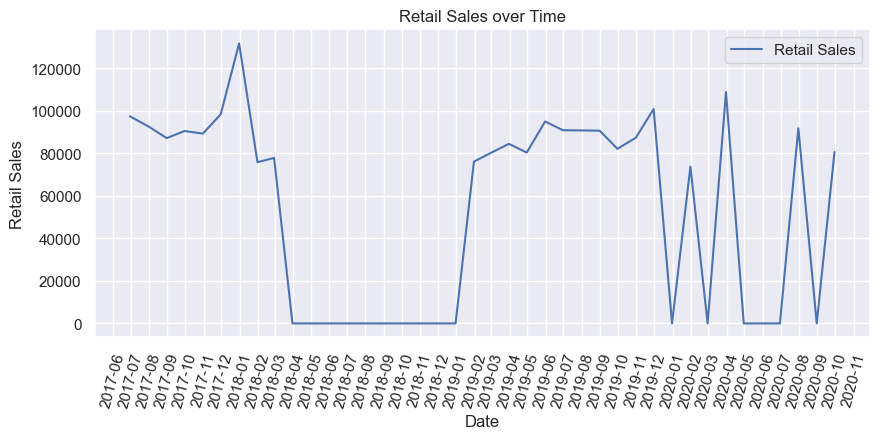

In [28]:
%matplotlib inline

# Plotting the original Retail Sales
plt.figure(figsize=(10, 4))
plt.plot(ddata.index, ddata, label='Retail Sales')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.title('Retail Sales over Time')
plt.xlabel('Date')
plt.xticks(rotation=75)
plt.ylabel('Retail Sales')
plt.legend()
plt.show()

In [29]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
result = adfuller(ddata)
print(f"ADF statistic = {result[0]:.3f}, p-value = {result[1]:.3f}")

ADF statistic = -4.390, p-value = 0.000


In [94]:
# df_diff = ddata.diff()

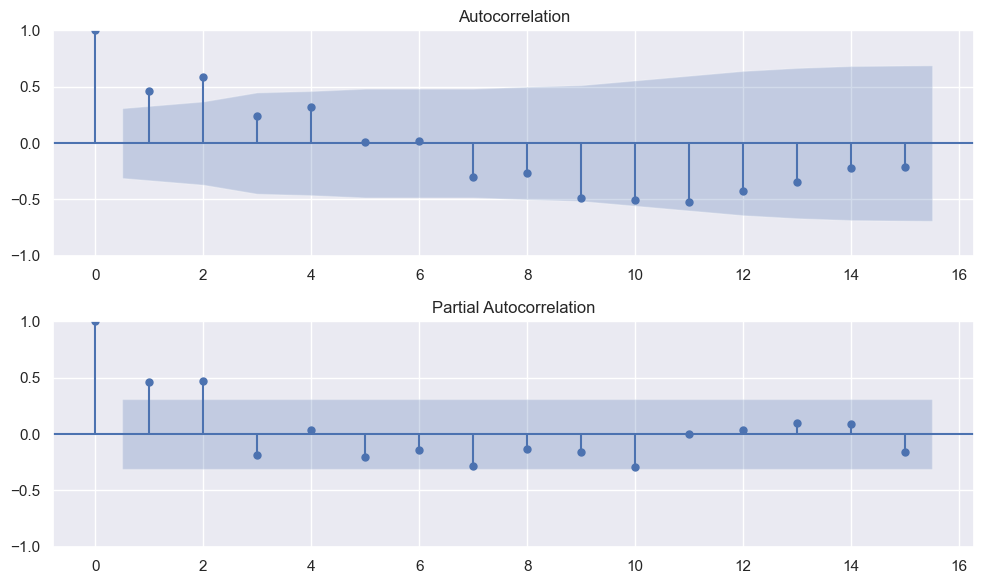

In [34]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
plot_acf(ddata, lags=15, ax=ax[0])
plot_pacf(ddata, lags=15, ax=ax[1])
plt.tight_layout()
plt.show()

In [65]:
n = len(ddata)
train_end = int(n * 0.6)
# print(n,train_end)
train = ddata.iloc[:train_end]
test = ddata.iloc[train_end:]

In [66]:
p = 4
model = AutoReg(train, lags=p, old_names=False)
model_fit = model.fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:           RETAIL SALES   No. Observations:                   24
Model:                     AutoReg(4)   Log Likelihood                -231.207
Method:               Conditional MLE   S.D. of innovations          25371.817
Date:                Thu, 13 Nov 2025   AIC                            474.413
Time:                        06:36:41   BIC                            480.388
Sample:                    10-31-2017   HQIC                           475.580
                         - 05-31-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.201e+04   8697.406      1.381      0.167   -5035.796    2.91e+04
RETAIL SALES.L1     0.7977      0.226      3.535      0.000       0.355       1.240
RETAIL SALES.L2     0.3110      

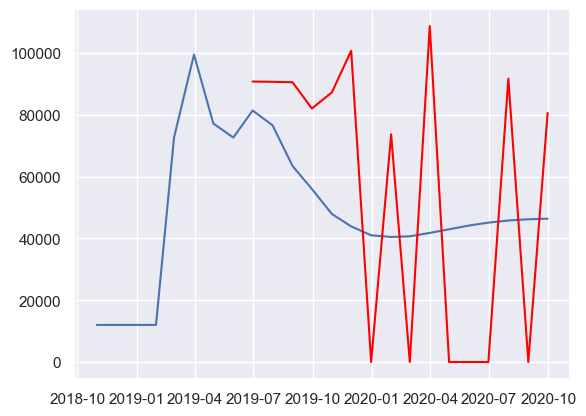

In [67]:
pred = model_fit.predict(start=len(test), end=(len(ddata)-1))
plt.plot(pred)
plt.plot(test, color='red')
plt.show()

In [68]:
# Create a date range with the desired frequency
date_range = pd.date_range(start=ddata.index.min(), end='2023-09-30', freq='M')
print(date_range)
pdata = ddata.reindex(date_range)

DatetimeIndex(['2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30',
               '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
               '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
               '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
      

C:\Users\nagha\AppData\Local\Temp\ipykernel_22608\1457786442.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=ddata.index.min(), end='2023-09-30', freq='M')


In [69]:
pred_data = pdata.fillna(0)
print(pred_data)

            RETAIL SALES
2017-06-30      97357.26
2017-07-31      92625.29
2017-08-31      87111.78
2017-09-30      90452.60
2017-10-31      89236.96
...                  ...
2023-05-31          0.00
2023-06-30          0.00
2023-07-31          0.00
2023-08-31          0.00
2023-09-30          0.00

[76 rows x 1 columns]


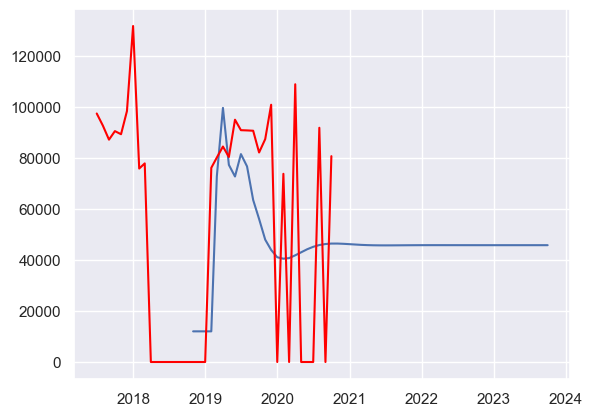

In [70]:
pred2 = model_fit.predict(start=len(test), end=(len(pred_data)-1))
plt.plot(pred2)
plt.plot(ddata, color='red')
plt.show()